In [1]:
import os
print(os.getcwd())


c:\Programs_CSE\StressPredictor\notebook


In [30]:
import pandas as pd
df = pd.read_csv("C:/Programs_CSE/StressPredictor/data/Stress-Lysis.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


<Axes: >

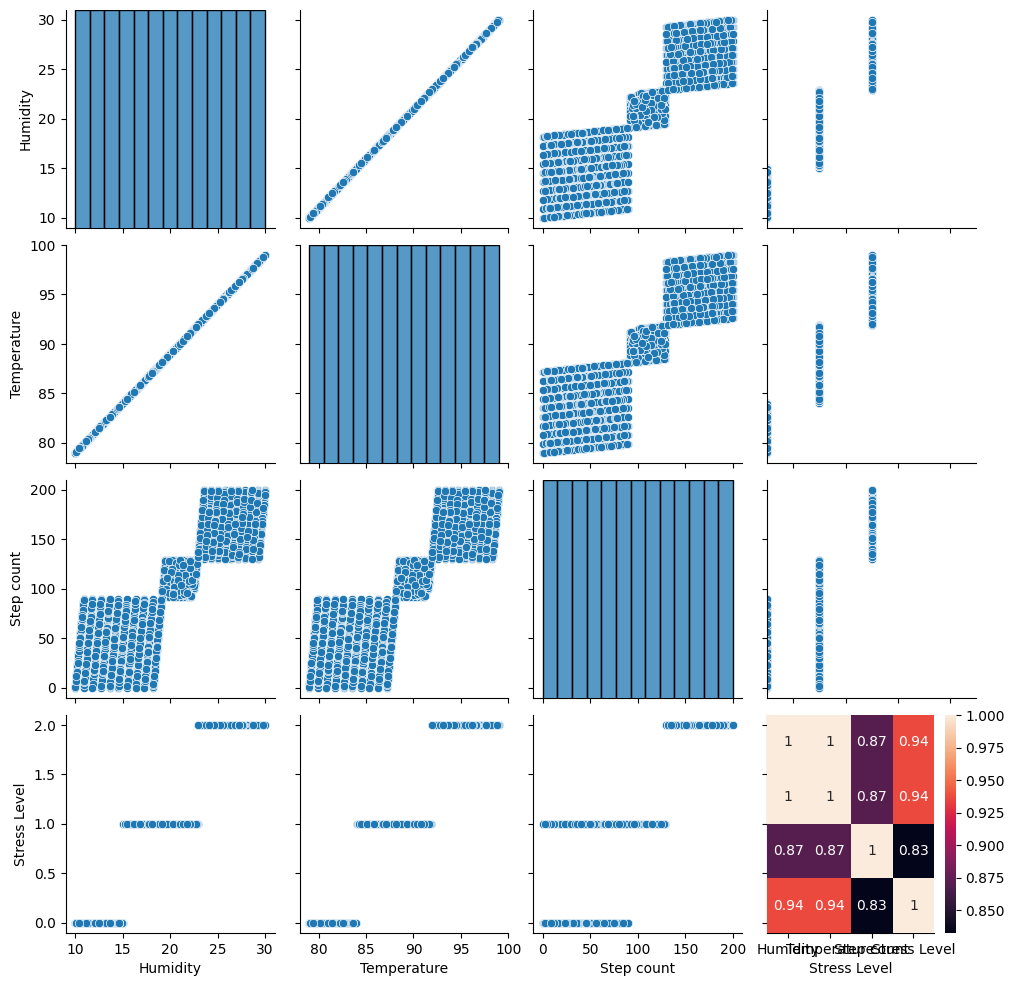

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
sns.heatmap(df.corr(), annot=True)


In [3]:
X = df[["Humidity", "Temperature", "Step count"]]
y = df["Stress Level"]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
df["Heat_Index"] = df["Temperature"] * df["Humidity"] / 100
df["Activity_Level"] = pd.cut(df["Step count"],
                              bins=[0,3000,8000,20000],
                              labels=["low","medium","high"])
df = pd.get_dummies(df, drop_first=True)


In [19]:

from sklearn.ensemble import RandomForestRegressor



In [20]:

rf = RandomForestRegressor().fit(X_train, y_train)



In [25]:
import joblib
joblib.dump(rf, "models/StressPredictor.pkl")
joblib.dump(scaler, "models/scaler.pkl")
model = joblib.load("models/StressPredictor.pkl")
scaler = joblib.load("models/scaler.pkl")